In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import insightface
import onnxruntime


from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [2]:
app=FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0,det_size=(640,640))

d:\python_project\face_swap\face_swap\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ASUS/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ASUS/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ASUS/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ASUS/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ASUS/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

(1599, 899, 3)


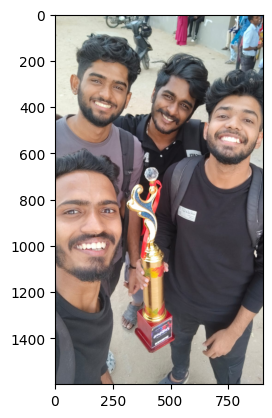

In [3]:
img=ins_get_image('us')

print(np.shape(img))
plt.imshow(img[:,:,::-1])
plt.show()

In [4]:
faces=app.get(img)

len(faces)


d:\python_project\face_swap\face_swap\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


4

In [5]:
print(faces[2])

{'bbox': array([ -37.8158 ,  679.9382 ,  287.14917, 1133.6176 ], dtype=float32), 'kps': array([[ 79.29503, 855.6603 ],
       [225.7646 , 848.9424 ],
       [182.24927, 931.2999 ],
       [ 80.87337, 997.46936],
       [230.02856, 990.09106]], dtype=float32), 'det_score': 0.8291434, 'landmark_3d_68': array([[-1.68217506e+01,  8.73249878e+02,  2.39206131e+02],
       [-7.58684349e+00,  9.19763062e+02,  2.29479965e+02],
       [-8.65298390e-01,  9.67486572e+02,  2.14645645e+02],
       [ 8.28676796e+00,  1.01194379e+03,  1.89549271e+02],
       [ 2.33606586e+01,  1.05043921e+03,  1.46133881e+02],
       [ 4.59285698e+01,  1.07789990e+03,  1.10800575e+02],
       [ 7.35442734e+01,  1.09858765e+03,  8.02296448e+01],
       [ 1.11354774e+02,  1.11346204e+03,  4.32464981e+01],
       [ 1.68312256e+02,  1.12501477e+03,  2.91008034e+01],
       [ 2.14677170e+02,  1.11133911e+03,  6.35098763e+01],
       [ 2.40706192e+02,  1.08817688e+03,  1.09288315e+02],
       [ 2.59348206e+02,  1.05947888e+

In [6]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

[422, 268, 605, 511]
422
268
605
511
[422, 268, 605, 511]
[422, 268, 605, 511]
[659, 358, 885, 629]
659
358
885
629
[659, 358, 885, 629]
[659, 358, 885, 629]
[-37, 679, 287, 1133]
-37
679
287
1133
[-37, 679, 287, 1133]
[37, 679, 287, 1133]
[105, 206, 316, 476]
105
206
316
476
[105, 206, 316, 476]
[105, 206, 316, 476]


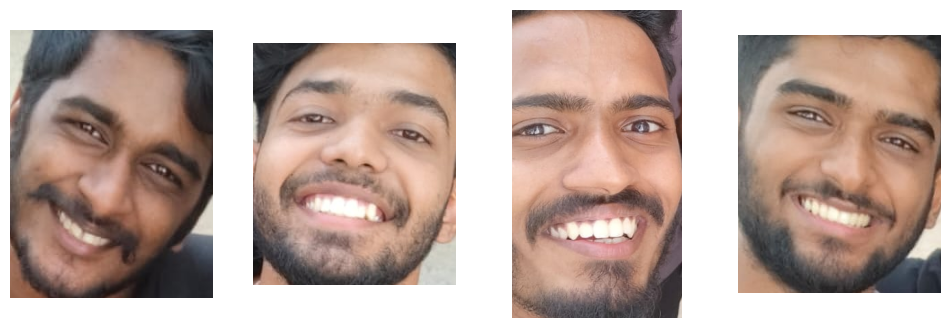

In [7]:
fig,axs=plt.subplots(1,4,figsize=(12,4))
for i,face in enumerate(faces):
    bbox=face['bbox']
    bbox=[int(b) for b in bbox]
    print(bbox)
    mbbox=[]
    for j in bbox:
        print(j)
        if j<0:
            j=-j
        mbbox.append(j)
    
    print(bbox)
    print(mbbox)
    axs[i].imshow(img[mbbox[1]:mbbox[3],mbbox[0]:mbbox[2],::-1])
    axs[i].axis("off")

In [13]:

swapper=insightface.model_zoo.get_model('face_swap\Lib\site-packages\insightface\model_zoo\inswapper_128.onnx',download=False,download_zip=False)


d:\python_project\face_swap\face_swap\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


105
206
316
476


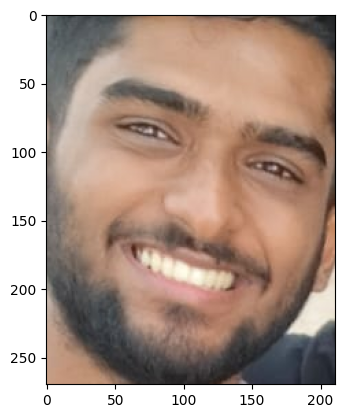

In [14]:
source=faces[3]
bbox=[int(b) for b in source['bbox']]
mbbox=[]
for j in bbox:
    print(j)
    if j<0:
        j=-j
    mbbox.append(j)
source_face=img[mbbox[1]:mbbox[3],mbbox[0]:mbbox[2],::-1]
plt.imshow(img[mbbox[1]:mbbox[3],mbbox[0]:mbbox[2],::-1])



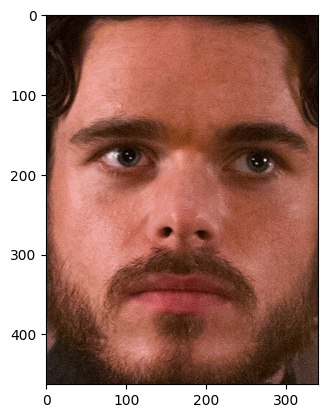

In [27]:
target_img=cv2.imread('rob_stark.jpg')
target_face=app.get(target_img)
target=target_face[0]
target_bbox=target['bbox']
target_bbox=[int(a) for a in target_bbox]
#target_face=target_img[target_bbox[1]:target_bbox[3],target_bbox[0]:target_bbox[2],::-1]
plt.imshow(target_img[target_bbox[1]:target_bbox[3],target_bbox[0]:target_bbox[2],::-1])

In [29]:
target_face

[{'bbox': array([ 836.72205,  186.8206 , 1177.9136 ,  649.0987 ], dtype=float32),
  'kps': array([[ 935.60803,  366.69955],
         [1099.173  ,  373.17862],
         [1020.8126 ,  444.36118],
         [ 945.0057 ,  530.301  ],
         [1071.2695 ,  536.22986]], dtype=float32),
  'det_score': 0.87773734,
  'landmark_3d_68': array([[ 8.32120789e+02,  3.67422913e+02,  2.46917953e+02],
         [ 8.34638489e+02,  4.17767334e+02,  2.39770142e+02],
         [ 8.37624634e+02,  4.69001587e+02,  2.28443130e+02],
         [ 8.43554504e+02,  5.17937500e+02,  2.08722412e+02],
         [ 8.55557251e+02,  5.62312378e+02,  1.69788712e+02],
         [ 8.78453613e+02,  5.96002136e+02,  1.35629028e+02],
         [ 9.07028992e+02,  6.22063354e+02,  1.07017494e+02],
         [ 9.41428528e+02,  6.42200317e+02,  7.18470154e+01],
         [ 9.97061401e+02,  6.60137146e+02,  5.26246529e+01],
         [ 1.05471497e+03,  6.48655518e+02,  7.29045639e+01],
         [ 1.09858606e+03,  6.27981201e+02,  1.1008143

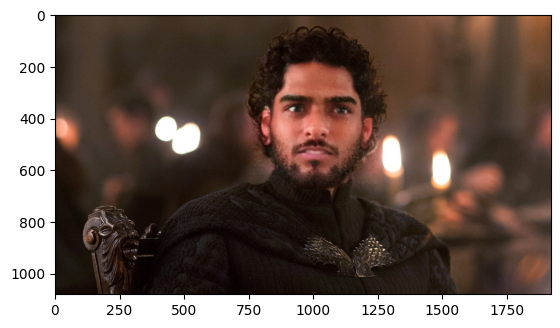

In [56]:
target_img=swapper.get(target_img,target,source,paste_back=True)
plt.imshow(target_img[:,:,::-1])

In [53]:
res=img.copy()
for face in faces:
    res=swapper.get(res,face,source,paste_back=True)


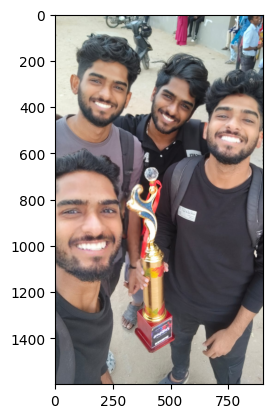

In [48]:
plt.imshow(res[:,:,::-1])

array([[[203, 219, 218],
        [203, 219, 218],
        [203, 219, 218],
        ...,
        [117,  88,  43],
        [117,  89,  42],
        [117,  88,  43]],

       [[203, 219, 218],
        [203, 219, 218],
        [202, 218, 217],
        ...,
        [114,  85,  40],
        [114,  86,  39],
        [115,  86,  41]],

       [[203, 219, 218],
        [202, 218, 217],
        [202, 218, 217],
        ...,
        [117,  86,  41],
        [117,  86,  41],
        [117,  85,  42]],

       ...,

       [[ 97,  88,  84],
        [ 98,  89,  85],
        [ 99,  90,  86],
        ...,
        [178, 187, 191],
        [178, 187, 191],
        [178, 187, 191]],

       [[ 95,  86,  82],
        [ 96,  87,  83],
        [ 97,  88,  84],
        ...,
        [178, 187, 191],
        [179, 188, 192],
        [179, 188, 192]],

       [[ 97,  88,  84],
        [ 98,  89,  85],
        [ 98,  89,  85],
        ...,
        [179, 188, 192],
        [179, 188, 191],
        [179, 188, 191]]